In [4]:
#Import libraries

!pip install --upgrade pip
!pip install keras
!pip install tensorflow

import pandas as pd
import pandas.util.testing as tm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
keras.backend.backend()
%matplotlib inline

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.3)


In [6]:
data = pd.read_csv("Cardiotocographic.csv")
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


In [7]:
data.shape

(2126, 22)

In [8]:
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'NSP'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

In [10]:
#outcome distribution
#imbalanced dataset
data.NSP.value_counts()

1    1655
2     295
3     176
Name: NSP, dtype: int64

In [11]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop("NSP",axis=1),data["NSP"],test_size=0.2,random_state=0)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

In [15]:
#converting the output variable to one hot encoded (multiclassification)
y_trainh=pd.get_dummies(y_train)

In [16]:
#converting the output variable to one hot encoded (multiclassification)
y_testh=pd.get_dummies(y_test)

In [17]:
y_train

1719    1
1376    1
1454    1
1805    1
1969    1
       ..
1033    1
1731    1
763     1
835     1
1653    1
Name: NSP, Length: 1700, dtype: int64

In [18]:
y_trainh.shape

(1700, 3)

In [19]:
#model building 
#input dimension is 21 feature variables 
#addiing dense layers of 50,35,15,7 with relu activation
#the output layer will be a softmax layer with 3 neurons for 3 classes
model=Sequential()
model.add(Dense(50,activation="relu",input_dim=21))
model.add(Dense(35,activation="relu"))
model.add(Dense(15,activation="relu"))
model.add(Dense(7,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1100      
_________________________________________________________________
dense_1 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                540       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 112       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 24        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


In [21]:
#compiling the model
#we set the loss to categorical entropy for multiclassification
#optimizer will be adam (batch wise)
#metric is accuracy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [22]:
#training the model
#3 rounds = 15 epochs
%%time
model.fit(X_train,y_trainh,epochs=5)

Epoch 1/5
54/54 [==============================] - 0s 1ms/step - loss: 1.5329 - accuracy: 0.7424
Epoch 2/5
54/54 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8329
Epoch 3/5
54/54 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8435
Epoch 4/5
54/54 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8641
Epoch 5/5
54/54 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8600
CPU times: user 979 ms, sys: 74.7 ms, total: 1.05 s
Wall time: 1.16 s


In [23]:
#evaluating our model on the test dataset
%%time
model.evaluate(X_test,y_testh)

14/14 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.8357
CPU times: user 225 ms, sys: 6 ms, total: 231 ms
Wall time: 236 ms


[0.42804616689682007, 0.8356807231903076]

In [28]:
#predicting on the test dataset
%%time
ypred=model.predict(X_test)

CPU times: user 81.7 ms, sys: 3.22 ms, total: 84.9 ms
Wall time: 84.1 ms


In [29]:
#converting the on hot encoded prediction to a single dimension array
ypred=np.argmax(ypred,axis=1)

In [30]:
ypred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0,

In [31]:
ypred=ypred+1
ypred

array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 3, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2,
       1, 3, 2, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1,

In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[300,  21,   5],
       [ 32,  22,   4],
       [  1,   7,  34]])

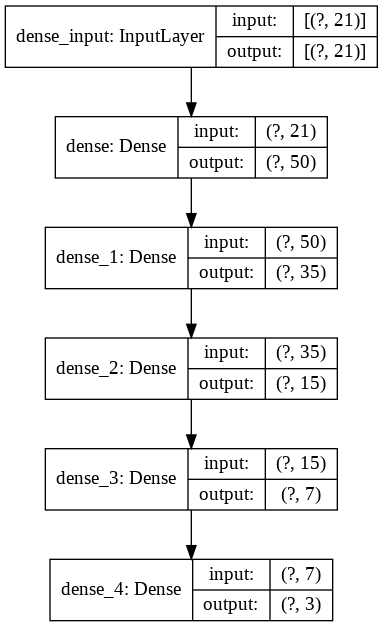

In [33]:
#plot showing the model flow with layer dimensions
keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)